**Muhammad Aizar Yazid / 1103223097**

1. Buat model Deep learning MLP (PyTorch and Tensorflow). Column "Cover_Type" adalah target.
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.


# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from itertools import cycle

# Exploration data

In [ ]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/compressed_data.csv.gz"
data = pd.read_csv(url, compression='gzip')

In [ ]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [ ]:
# Check for missing values
print(data.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


In [ ]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")


Number of duplicate rows: 0


In [ ]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
Counter(y_train)

Counter({1: 226640, 6: 16408, 0: 169472, 4: 7594, 2: 28603, 3: 2198, 5: 13894})

# Tensor Flow

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
hid = tf.keras.layers.Dense(256, activation='relu')(inputs)
hid = tf.keras.layers.Dense(128, activation='relu')(hid)
hid = tf.keras.layers.Dense(64, activation='relu')(hid)
outputs = tf.keras.layers.Dense(7, activation='softmax')(hid)

tf_model = tf.keras.Model(inputs, outputs)

earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=128,
    epochs=50,
    callbacks=[earlystop]
)


Epoch 1/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7429 - loss: 0.6130 - val_accuracy: 0.8159 - val_loss: 0.4341
Epoch 2/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8280 - loss: 0.4057 - val_accuracy: 0.8541 - val_loss: 0.3544
Epoch 3/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8568 - loss: 0.3459 - val_accuracy: 0.8695 - val_loss: 0.3202
Epoch 4/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8740 - loss: 0.3075 - val_accuracy: 0.8752 - val_loss: 0.3019
Epoch 5/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8845 - loss: 0.2832 - val_accuracy: 0.8854 - val_loss: 0.2803
Epoch 6/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8915 - loss: 0.2654 - val_accuracy: 0.8941 - val_loss: 0.2598
Epoch 7/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8975 - loss: 0.2501 - val_accuracy: 0.8980 - val_loss: 0.2532
Epoch 8/50
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9030 - loss: 0

In [ ]:
# Predict probabilities and classes
y_pred_probs = tf_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, y_pred_probs):
    """Calculates and prints model evaluation metrics."""
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:\n", cm)

# Evaluate the TensorFlow model
evaluate_model(y_test, y_pred, y_pred_probs)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy: 0.9311
Precision: 0.9312
Recall: 0.9311
F1-score: 0.9310
ROC AUC: 0.9957

Confusion Matrix:
 [[39534  2624     6     0    26     8   170]
 [ 2795 53393   166     0   157   121    29]
 [    2   118  6520    62     7   442     0]
 [    0     0    54   457     0    38     0]
 [   54   386    34     0  1414    11     0]
 [    6   108   194    25     4  3136     0]
 [  299    64     0     0     0     0  3739]]


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Unique in y_label: [0 1 2 3 4 5 6]


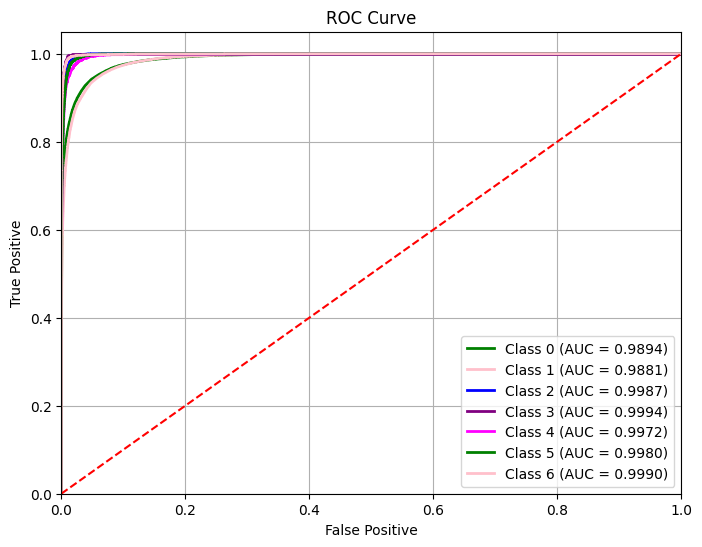

In [ ]:
y_pred_probs = tf_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)


n_classes = y_pred_probs.shape[1]
print("Unique in y_label:", np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))


colors = cycle(['green', 'pink', 'blue', 'purple', 'magenta'])

plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')


plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# PyTorch

In [ ]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class PyNeuNet(nn.Module):
  def __init__(self):
    super(PyNeuNet, self).__init__()
    self.fc1 = nn.Linear(X_train.shape[1], 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 7)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

t_model = PyNeuNet()
optimizer = optim.Adam(t_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

epochs = 15

for epoch in range(epochs):
    t_model.train()
    total_loss = 0  # Reset total loss at the start of each epoch

    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = t_model(x)
        # Compute loss
        loss = criterion(output, target)
        # Backward pass
        loss.backward()
        optimizer.step()
        # Accumulate the loss
        total_loss += loss.item()

    # Calculate average loss for this epoch
    avg_loss = total_loss / len(train_loader)

    # Print the loss every 10 epochs
    if epoch % 2 == 0:
        print(f'Epoch: {epoch+1}, Average Loss: {avg_loss:.4f}')

Epoch: 1, Average Loss: 0.5381
Epoch: 3, Average Loss: 0.3536
Epoch: 5, Average Loss: 0.2923
Epoch: 7, Average Loss: 0.2566
Epoch: 9, Average Loss: 0.2346
Epoch: 11, Average Loss: 0.2172
Epoch: 13, Average Loss: 0.2076
Epoch: 15, Average Loss: 0.1955


In [ ]:
t_model.eval()

# Convert X_test and y_test to PyTorch tensors
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

test_dataset = TensorDataset(X_test_torch, y_test_torch) # Use the PyTorch tensors here
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

y_pred_probs = []
y_actual = []

with torch.no_grad():
  for x, target in test_loader:
    output = t_model(x)
    probabilities = F.softmax(output, dim=1).numpy()
    y_pred_probs.extend(probabilities)
    y_actual.extend(target.numpy())
    loss = criterion(output, target)
    total_loss += loss.item()


In [ ]:
tensor_accuracy = accuracy_score(y_actual, y_pred)
tensor_precision = precision_score(y_actual, y_pred, average='weighted')
tensor_recall = recall_score(y_actual, y_pred, average='weighted')
tensor_f1 = f1_score(y_actual, y_pred, average='weighted')
tensor_roc = roc_auc_score(y_actual, y_pred_probs, multi_class='ovr')

print(f"Accuracy: {tensor_accuracy}")
print(f"Precision: {tensor_precision}")
print(f"Recall: {tensor_recall}")
print(f"F1-score: {tensor_f1}")
print(f"ROC AUC: {tensor_roc}")

Accuracy: 0.3780022890975276
Precision: 0.37698363903078874
Recall: 0.3780022890975276
F1-score: 0.37748654528492864
ROC AUC: 0.9941964561338323


Unique in y_label: [0 1 2 3 4 5 6]


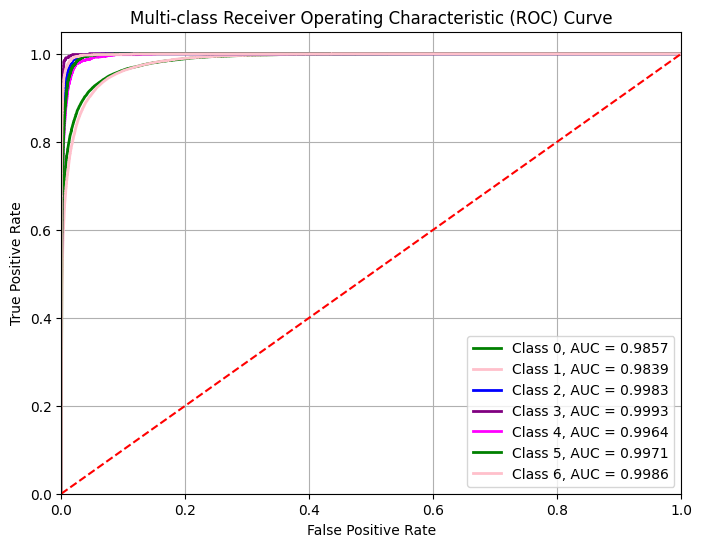

In [ ]:
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)
n_classes = y_pred_probs.shape[1]
print("Unique in y_label:", np.unique(y_test))

y_test_bin = label_binarize(y_actual, classes=np.arange(n_classes))
colors = cycle(['green', 'pink', 'blue', 'purple', 'magenta'])

plt.figure(figsize=(8, 6))


for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i}, AUC = {roc_auc:.4f}')

# Garis diagonal referensi
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Penjelasan Persamaan Matematika

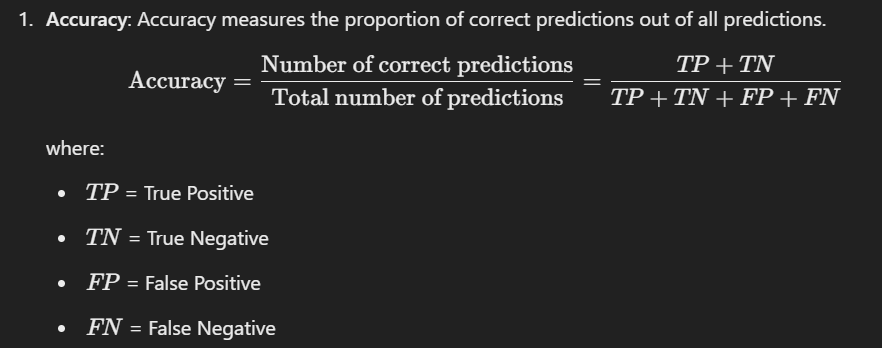

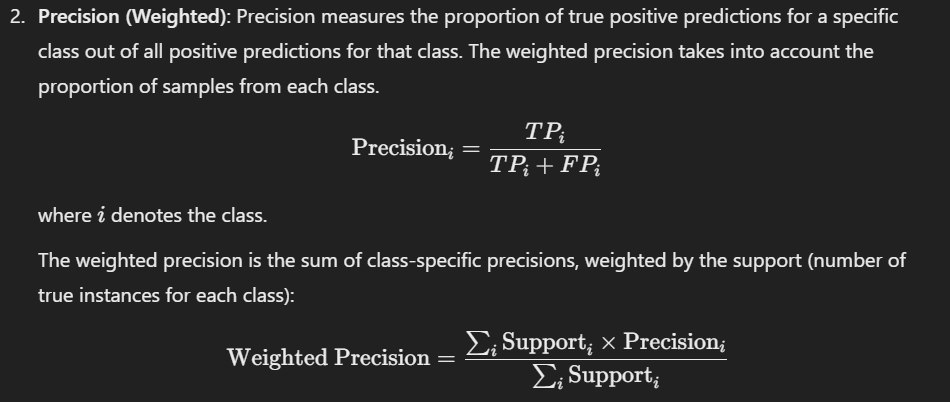

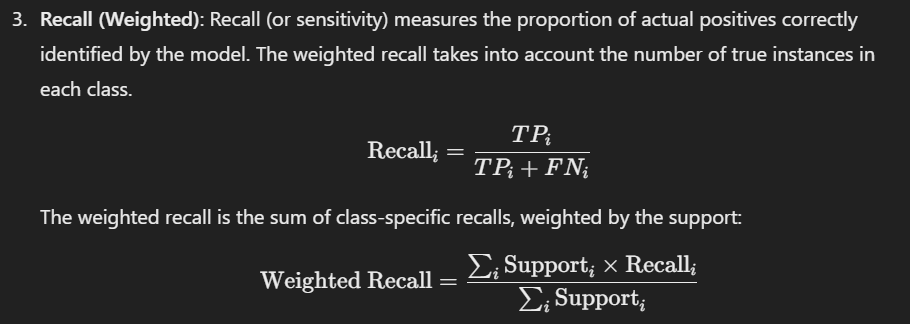

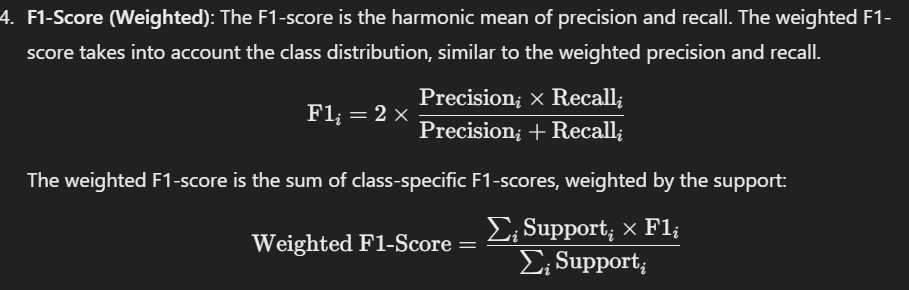

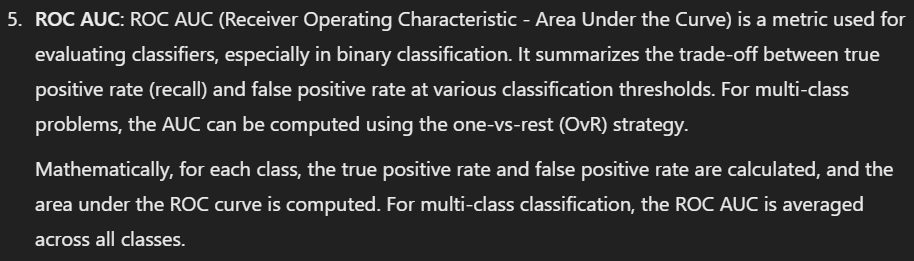

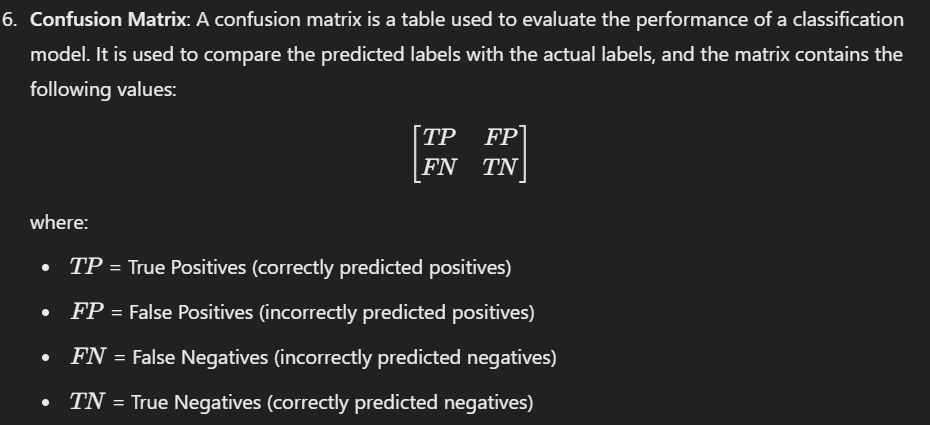